In [1]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

# Импортируем helper (если существует)
try:
    from helper.functionanalyzer import FunctionAnalyzer
except ImportError:
    print("⚠️  Модуль helper.functionanalyzer не найден (это нормально, если он не используется)")


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

# Пробуем импортировать nvmath независимо от версии Python
# (модуль может быть обновлен и поддерживать более новые версии)
try:
    import nvmath
    print(f"✅ Модуль nvmath успешно импортирован (Python {sys.version_info.major}.{sys.version_info.minor})")
except ImportError as e:
    # Проверяем, связана ли ошибка с версией Python
    if sys.version_info >= (3, 13):
        print(f"⚠️  Модуль nvmath не установлен или не поддерживает Python {sys.version_info.major}.{sys.version_info.minor}")
        print(f"   Попробуйте обновить nvmath: pip install --upgrade nvmath")
        print(f"   Или используйте Python 3.12 или ниже для полной совместимости")
    else:
        print(f"⚠️  Модуль nvmath не установлен (Python {sys.version_info.major}.{sys.version_info.minor})")
        print(f"   Установите: pip install nvmath")
except Exception as e:
    print(f"⚠️  Ошибка при импорте nvmath: {e}")



📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-10. Кластеризация и техники понижения размерности. Часть I
📂 Текущая рабочая директория (до chdir): c:\Users\stepu\OneDrive\IDE
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-10. Кластеризация и техники понижения размерности. Часть I
Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


⚠️  Модуль nvmath не установлен или не поддерживает Python 3.13
   Попробуйте обновить nvmath: pip install --upgrade nvmath
   Или используйте Python 3.12 или ниже для полной совместимости


In [2]:
# настройка логгирования

%pip install loguru

from loguru import logger
from helper.logging_config import setup_logging
import logging

# Вызываем настройку в самом начале работы приложения
setup_logging()

# Уменьшаем уровень логирования для sklearn и sklearnex, чтобы убрать лишние INFO сообщения
logging.getLogger('sklearn').setLevel(logging.WARNING)
logging.getLogger('sklearnex').setLevel(logging.WARNING)
logging.getLogger('sklearn.utils.validation').setLevel(logging.WARNING)
logging.getLogger('sklearn.cluster').setLevel(logging.WARNING)

#user_id = 123
#status = "success"
# Привычный и читаемый синтаксис
#logger.info("Аутентификация для пользователя {id} прошла со статусом: {status}", id=user_id, status=status)

# @logger.catch
# def main_logic():
#     logger.info("Приложение начинает работу.")
#     # ... ваш основной код ...
#     a = 10
#     b = 0
#     result = a / b # Это вызовет ошибку, которую поймает @logger.catch

@logger.catch
def main_logic():
    logger.info("Приложение начинает работу.")
    
if __name__ == "__main__":
    main_logic()



21:48:52 | INFO     | helper.logging_config:setup_logging - Стандартный logging перехвачен.
21:48:52 | INFO     | helper.logging_config:setup_logging - Конфигурация логирования завершена.
21:48:52 | INFO     | __main__:main_logic - Приложение начинает работу.


Note: you may need to restart the kernel to use updated packages.


# 7. Итоговая практика по алгоритмам кластеризации

✍ Вы изучили все основные методы кластеризации, а это значит, что пришло время применить их на практике. В предыдущих модулях вы решали задачи по сегментации клиентов, и сейчас мы решим похожую задачу — будем сегментировать клиентов банка, которые пользуются кредитными картами.

В нашем распоряжении есть [данные](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@CC_GENERAL.zip) о 8950 держателях кредитных карт одного из банков Нью-Йорка. Банк собрал достаточно много данных об этих людях и о том, как они пользовались кредитными картами за последние полгода.

Маркетологи хотят запустить рекламную кампанию, однако для этого необходимо произвести сегментацию клиентов, чтобы сделать акционное предложение более персонализированным. Мы попробуем использовать все известные нам методы кластеризации и посмотрим на получившиеся результаты.

## Информация о клиентах
CUST_ID — идентификационный номер держателя карты;

BALANCE — баланс, доступный для совершения покупок;

BALANCEFREQUENCY — как часто обновляется показатель баланса (1 — часто, 0 — нечасто);

PURCHASES — количество покупок, оплаченных со счёта;

ONEOFFPURCHASES — максимальная сумма единовременной покупки;

INSTALLMENTSPURCHASES — сумма покупок, сделанных в рассрочку;

PURCHASESFREQUENCY — как часто в целом совершаются покупки (1 — часто, 0 — нечасто);

ONEOFFPURCHASESFREQUENCY — частота совершения единовременных покупок (1 — часто, 0 — нечасто);

PURCHASESINSTALLMENTSFREQUENCY — частота совершения покупок в рассрочку (1 — часто, 0 — нечасто);

CASHADVANCEFREQUENCY — частота внесения авансовых платежей;

CASHADVANCETRX — количество транзакций с авансовыми взносами;

PURCHASESTRX — количество совершённых транзакций с покупками;

CREDITLIMIT — кредитный лимит держателя карты;

PAYMENTS — сумма платежей пользователя;

MINIMUM_PAYMENTS — сумма минимального платежа пользователя;

PRCFULLPAYMENT — выплаченный процент от полного платежа;

TENURE — срок обслуживания кредитной карты.

In [3]:
df = pd.read_csv('data/CC GENERAL.csv', sep=',')

print(f"Размер датасета до обработки: {df.shape}")
print(f"\nНазвания столбцов:")
print(df.columns.tolist())

# Удаляем индексный столбец (Unnamed: 0) - это порядковый номер строки
if 'Unnamed: 0' in df.columns:
    print(f"\n⚠️  Удаляем индексный столбец 'Unnamed: 0' (порядковый номер строки)")
    df = df.drop(columns=['Unnamed: 0'])
    print(f"✅ Столбец 'Unnamed: 0' удален.")
else:
    print(f"\n✅ Индексный столбец 'Unnamed: 0' не найден.")

print(f"\nРазмер датасета после обработки: {df.shape}")
print(f"\nПервые строки:")
df.head()

Размер датасета до обработки: (8950, 18)

Названия столбцов:
['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

✅ Индексный столбец 'Unnamed: 0' не найден.

Размер датасета после обработки: (8950, 18)

Первые строки:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Задание 7.2
1 point possible (graded)
Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?

In [4]:
# Проверка данных на наличие пропущенных значений
print("Проверка пропущенных значений:")
print(f"\nКоличество пропусков по столбцам:")
missing_by_column = df.isna().sum()
print(missing_by_column[missing_by_column > 0])

# Общее количество пропусков в данных
total_missing = df.isna().sum().sum()
print(f"\n{'='*50}")
print(f"Всего пропусков в данных: {total_missing}")
print(f"{'='*50}")

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"Размер датасета: {df.shape}")
print(f"Общее количество ячеек: {df.shape[0] * df.shape[1]}")
missing_percent = (total_missing / (df.shape[0] * df.shape[1]) * 100)
print(f"Процент пропусков: {missing_percent:.2f}%")


Проверка пропущенных значений:

Количество пропусков по столбцам:
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Всего пропусков в данных: 314

Дополнительная информация:
Размер датасета: (8950, 18)
Общее количество ячеек: 161100
Процент пропусков: 0.19%


### Задание 7.3
1 point possible (graded)
Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака MINIMUM_PAYMENTS (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.

In [6]:
# Заполнение пропусков средними арифметическими для признаков
print("Заполнение пропусков средними значениями...")

# Вычисляем средние значения только для числовых столбцов
numeric_means = df.select_dtypes(include=[np.number]).mean()

# Сохраняем средние значения до заполнения для справки
print(f"\nСредние значения числовых признаков до заполнения:")
print(numeric_means)

# Заполняем пропуски средними значениями только для числовых столбцов
df_filled = df.copy()
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isna().sum() > 0:
        df_filled[col] = df[col].fillna(numeric_means[col])

# Проверяем, что пропуски заполнены
print(f"\nПроверка пропусков после заполнения:")
total_missing_after = df_filled.isna().sum().sum()
print(f"Всего пропусков после заполнения: {total_missing_after}")

# Вычисляем среднее арифметическое для MINIMUM_PAYMENTS после заполнения
mean_minimum_payments = df_filled['MINIMUM_PAYMENTS'].mean()
mean_minimum_payments_rounded = round(mean_minimum_payments, 2)

print(f"\n{'='*50}")
print(f"Среднее арифметическое для MINIMUM_PAYMENTS (после заполнения): {mean_minimum_payments:.6f}")
print(f"Округленное до 2 знаков: {mean_minimum_payments_rounded}")
print(f"{'='*50}")

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"Среднее MINIMUM_PAYMENTS до заполнения: {df['MINIMUM_PAYMENTS'].mean():.6f}")
print(f"Количество пропусков в MINIMUM_PAYMENTS: {df['MINIMUM_PAYMENTS'].isna().sum()}")

# Обновляем исходный датафрейм
df = df_filled.copy()
print(f"\n✅ Датафрейм обновлен: пропуски заполнены средними значениями")


Заполнение пропусков средними значениями...

Средние значения числовых признаков до заполнения:
BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

Проверка пропусков после заполнения:
Всего пропусков после заполнения: 0

### Задание 7.4
1 point possible (graded)
Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Округлите до двух знаков после точки-разделителя.

Не забудьте предварительно удалить признак CUST_ID — он не поможет при кластеризации, так как не несёт никакой содержательной информации.

In [7]:
# Импорт StandardScaler
from sklearn.preprocessing import StandardScaler

# Удаляем признак CUST_ID, так как он не несёт содержательной информации для кластеризации
print("Удаление признака CUST_ID...")
if 'CUST_ID' in df.columns:
    df_features = df.drop(columns=['CUST_ID'])
    print(f"✅ Столбец 'CUST_ID' удален.")
    print(f"Размер датасета после удаления CUST_ID: {df_features.shape}")
else:
    df_features = df.copy()
    print(f"⚠️  Столбец 'CUST_ID' не найден в датасете.")

# Выбираем только числовые признаки для нормализации
print(f"\nСтолбцы для нормализации: {df_features.columns.tolist()}")

# Нормализация данных с помощью StandardScaler
print("\nНормализация данных с помощью StandardScaler...")
scaler = StandardScaler()
X_norm = scaler.fit_transform(df_features)

print(f"Размер нормализованной матрицы: {X_norm.shape}")
print(f"Тип данных: {type(X_norm)}")

# Выводим первое значение в первой строке
first_value = X_norm[0][0]
first_value_rounded = round(first_value, 2)

print(f"\n{'='*50}")
print(f"Первое значение в первой строке (X_norm[0][0]): {first_value:.6f}")
print(f"Округленное до 2 знаков: {first_value_rounded}")
print(f"{'='*50}")

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"Первая строка нормализованных данных (первые 5 значений): {X_norm[0][:5]}")
print(f"Среднее значение первого признака после нормализации: {X_norm[:, 0].mean():.6f}")
print(f"Стандартное отклонение первого признака после нормализации: {X_norm[:, 0].std():.6f}")


Удаление признака CUST_ID...
✅ Столбец 'CUST_ID' удален.
Размер датасета после удаления CUST_ID: (8950, 17)

Столбцы для нормализации: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Нормализация данных с помощью StandardScaler...
Размер нормализованной матрицы: (8950, 17)
Тип данных: <class 'numpy.ndarray'>

Первое значение в первой строке (X_norm[0][0]): -0.731989
Округленное до 2 знаков: -0.73

Дополнительная информация:
Первая строка нормализованных данных (первые 5 значений): [-0.73198937 -0.24943448 -0.42489974 -0.35693402 -0.34907882]
Среднее значение первого признака после нормализации: -0.000000
Стандартное отклонение первого признака после нормализации: 1.000000


### Задание 7.5
1 point possible (graded)
Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём значение 42, параметр init='random'.

Поиск оптимального количества кластеров с помощью коэффициента силуэта...
Перебираем диапазон: [2, 3, 4, 5, 6, 7, 8, 9]

Количество кластеров:  2 | Коэффициент силуэта: 0.209486
Количество кластеров:  3 | Коэффициент силуэта: 0.250154
Количество кластеров:  4 | Коэффициент силуэта: 0.197607
Количество кластеров:  5 | Коэффициент силуэта: 0.193319
Количество кластеров:  6 | Коэффициент силуэта: 0.202755
Количество кластеров:  7 | Коэффициент силуэта: 0.208789
Количество кластеров:  8 | Коэффициент силуэта: 0.222084


22:02:45 | DEBUG    | logging:callHandlers - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
22:02:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
22:02:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
22:02:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='norma

Количество кластеров:  9 | Коэффициент силуэта: 0.212863

ОПТИМАЛЬНОЕ КОЛИЧЕСТВО КЛАСТЕРОВ: 3
Коэффициент силуэта: 0.250154


22:02:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRUSHSCI.TTF', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
22:02:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\times.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
22:02:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
22:02:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LBRITE.TTF', name='Lucida Bright', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
22:02:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\

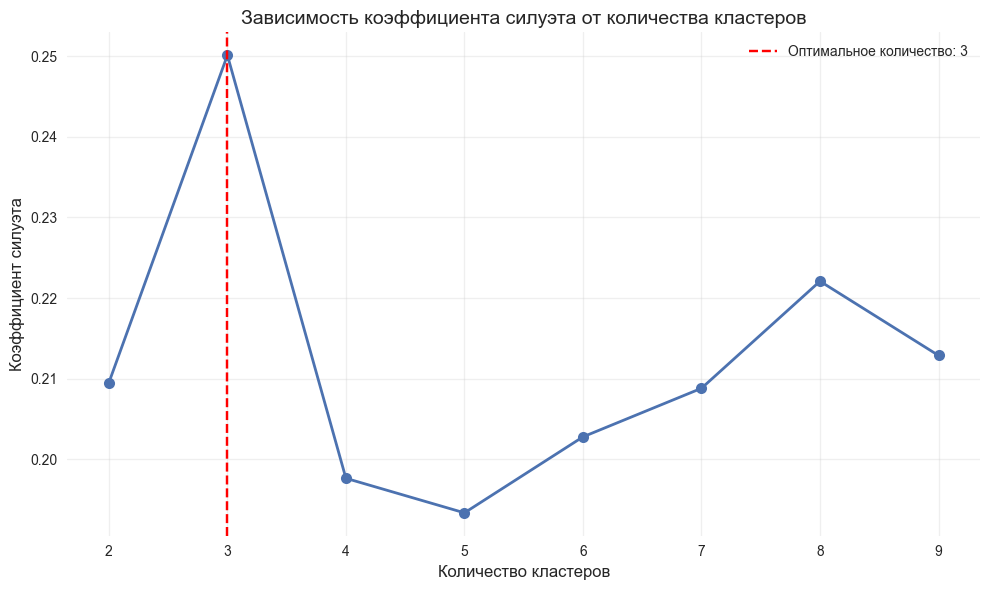


Таблица результатов:
----------------------------------------
Кластеры     Коэффициент силуэта 
----------------------------------------
2            0.209486            
3            0.250154             ← оптимальное
4            0.197607            
5            0.193319            
6            0.202755            
7            0.208789            
8            0.222084            
9            0.212863            
----------------------------------------


In [8]:
# Импорт необходимых библиотек
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Диапазон количества кластеров для перебора
n_clusters_range = range(2, 10)  # от 2 до 9 включительно

# Словарь для хранения результатов
silhouette_scores = {}

print("Поиск оптимального количества кластеров с помощью коэффициента силуэта...")
print(f"Перебираем диапазон: {list(n_clusters_range)}\n")

# Перебираем количество кластеров
for n_clusters in n_clusters_range:
    # Создаем модель KMeans с указанными параметрами
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='random', n_init=10)
    
    # Обучаем модель и получаем метки кластеров
    cluster_labels = kmeans.fit_predict(X_norm)
    
    # Вычисляем коэффициент силуэта
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg
    
    print(f"Количество кластеров: {n_clusters:2d} | Коэффициент силуэта: {silhouette_avg:.6f}")

# Находим оптимальное количество кластеров (максимальный коэффициент силуэта)
optimal_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
optimal_score = silhouette_scores[optimal_n_clusters]

print(f"\n{'='*60}")
print(f"ОПТИМАЛЬНОЕ КОЛИЧЕСТВО КЛАСТЕРОВ: {optimal_n_clusters}")
print(f"Коэффициент силуэта: {optimal_score:.6f}")
print(f"{'='*60}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 
         marker='o', linewidth=2, markersize=8)
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', 
            label=f'Оптимальное количество: {optimal_n_clusters}')
plt.xlabel('Количество кластеров', fontsize=12)
plt.ylabel('Коэффициент силуэта', fontsize=12)
plt.title('Зависимость коэффициента силуэта от количества кластеров', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(list(n_clusters_range))
plt.tight_layout()
plt.show()

# Выводим таблицу результатов
print("\nТаблица результатов:")
print("-" * 40)
print(f"{'Кластеры':<12} {'Коэффициент силуэта':<20}")
print("-" * 40)
for n_clusters in sorted(silhouette_scores.keys()):
    marker = " ← оптимальное" if n_clusters == optimal_n_clusters else ""
    print(f"{n_clusters:<12} {silhouette_scores[n_clusters]:<20.6f}{marker}")
print("-" * 40)


### Задание 7.6
1 point possible (graded)
Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [17]:
# Кластеризация k-means с оптимальным количеством кластеров (как в эталонном решении)
from sklearn.cluster import KMeans

# Создаем и обучаем модель KMeans с 3 кластерами (как в эталонном решении)
kmeans = KMeans(n_clusters=3, random_state=42, init='random')
kmeans.fit(X_norm)

# Добавляем метки кластеров в датафрейм (как в эталонном решении)
df.loc[:, 'label'] = kmeans.labels_

# Находим минимальное количество человек в кластере (как в эталонном решении)
min_cluster_size = df.label.value_counts().min()

print(f"{'='*50}")
print(f"РЕЗУЛЬТАТ:")
print(f"Минимальное количество человек в кластере: {min_cluster_size}")
print(f"{'='*50}")

# Дополнительная информация
print(f"\nКоличество человек в каждом кластере:")
print(df.label.value_counts().sort_index())
print(f"\nОбщее количество наблюдений: {len(df)}")


РЕЗУЛЬТАТ:
Минимальное количество человек в кластере: 1251

Количество человек в каждом кластере:
label
0    1251
1    1596
2    6103
Name: count, dtype: int64

Общее количество наблюдений: 8950


В эталонном решении был ответ 1235. Вероятно, зависит от версии используемых библиотек.

### Задание 7.7
1 point possible (graded)
Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено?

22:06:01 | DEBUG    | logging:callHandlers - findfont: Matching sans\-serif:style=normal:variant=normal:weight=bold:stretch=normal:size=12.0.
22:06:01 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.05
22:06:01 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
22:06:01 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal'

Применяем DBSCAN с параметрами по умолчанию...
Параметры по умолчанию: eps=0.5, min_samples=5

РЕЗУЛЬТАТЫ DBSCAN (параметры по умолчанию):
Количество выделенных кластеров: 38
Количество шумовых точек: 6627

Дополнительная информация:
Уникальные метки кластеров: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Общее количество наблюдений: 8950

Количество точек в каждом кластере:
----------------------------------------
Кластер 0:  1698 точек
Кластер 1:     8 точек
Кластер 2:    34 точек
Кластер 3:    11 точек
Кластер 4:     6 точек
Кластер 5:   234 точек
Кластер 6:     9 точек
Кластер 7:    13 точек
Кластер 8:    23 точек
Кластер 9:    14 точек
Кластер 10:     8 точек
Кластер 11:    60 точек
Кластер 12:     7 точек
Кластер 13:     6 точек
Кластер 14:     6 точек
Кластер 15:    23 точек
Кластер 16:    18 точек
Кластер 17:    30 точек
Кластер 18:     5 точек
Кластер 19:     7 точек
Кластер 2

22:06:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ITCBLKAD.TTF', name='Blackadder ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
22:06:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\HATTEN.TTF', name='Haettenschweiler', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
22:06:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mingliub.ttc', name='MingLiU-ExtB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
22:06:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\palabi.ttf', name='Palatino Linotype', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.05
22:06:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fon

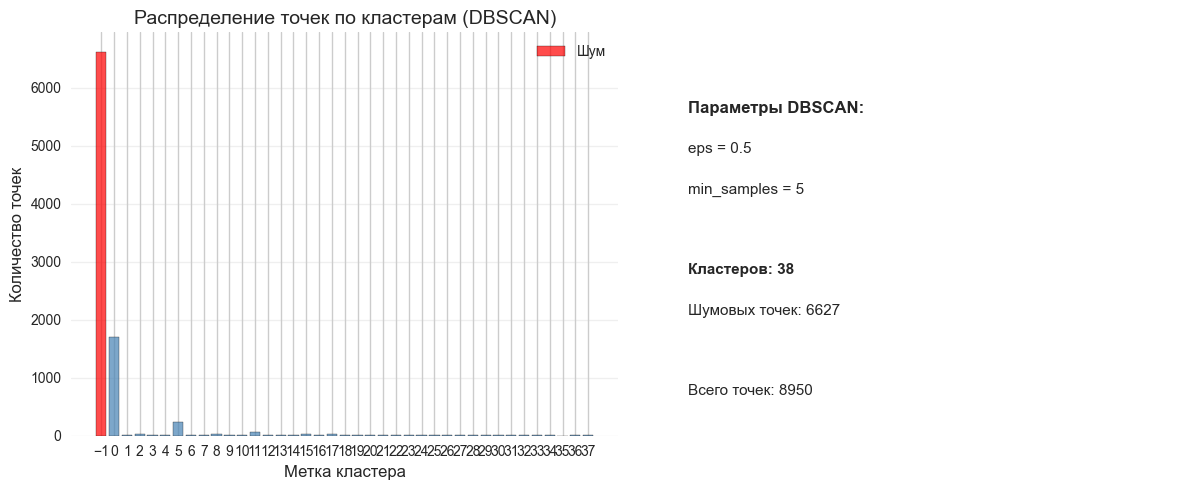

In [10]:
# Импорт DBSCAN
from sklearn.cluster import DBSCAN

# Применяем DBSCAN с параметрами по умолчанию
# Параметры по умолчанию: eps=0.5, min_samples=5
print("Применяем DBSCAN с параметрами по умолчанию...")
print("Параметры по умолчанию: eps=0.5, min_samples=5\n")

dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_norm)

# Подсчитываем количество кластеров (исключаем шумовые точки с меткой -1)
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels[unique_labels != -1])  # Исключаем метку -1 (шум)
n_noise = np.sum(dbscan_labels == -1)  # Количество шумовых точек

print(f"{'='*50}")
print(f"РЕЗУЛЬТАТЫ DBSCAN (параметры по умолчанию):")
print(f"Количество выделенных кластеров: {n_clusters}")
print(f"Количество шумовых точек: {n_noise}")
print(f"{'='*50}")

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"Уникальные метки кластеров: {sorted(unique_labels)}")
print(f"Общее количество наблюдений: {len(dbscan_labels)}")

# Подсчитываем количество точек в каждом кластере
if n_clusters > 0:
    print(f"\nКоличество точек в каждом кластере:")
    print("-" * 40)
    for label in sorted(unique_labels):
        if label != -1:
            count = np.sum(dbscan_labels == label)
            print(f"Кластер {label}: {count:5d} точек")
    print("-" * 40)
    if n_noise > 0:
        print(f"Шум (метка -1): {n_noise:5d} точек")
else:
    print(f"\n⚠️  Кластеры не были выделены. Все точки помечены как шум.")

# Визуализация результатов (если есть кластеры)
if n_clusters > 0:
    plt.figure(figsize=(12, 5))
    
    # Подсчет точек по кластерам
    cluster_counts = {}
    for label in unique_labels:
        if label != -1:
            cluster_counts[label] = np.sum(dbscan_labels == label)
    if n_noise > 0:
        cluster_counts[-1] = n_noise
    
    # График распределения по кластерам
    plt.subplot(1, 2, 1)
    labels_sorted = sorted(cluster_counts.keys())
    counts_sorted = [cluster_counts[l] for l in labels_sorted]
    colors = ['red' if l == -1 else 'steelblue' for l in labels_sorted]
    
    plt.bar(labels_sorted, counts_sorted, color=colors, alpha=0.7, edgecolor='black')
    plt.xlabel('Метка кластера', fontsize=12)
    plt.ylabel('Количество точек', fontsize=12)
    plt.title('Распределение точек по кластерам (DBSCAN)', fontsize=14)
    plt.xticks(labels_sorted)
    plt.grid(axis='y', alpha=0.3)
    if n_noise > 0:
        plt.legend(['Шум', 'Кластеры'], loc='upper right')
    
    # Информация о параметрах
    plt.subplot(1, 2, 2)
    plt.text(0.1, 0.8, f'Параметры DBSCAN:', fontsize=12, weight='bold', transform=plt.gca().transAxes)
    plt.text(0.1, 0.7, f'eps = {dbscan.eps}', fontsize=11, transform=plt.gca().transAxes)
    plt.text(0.1, 0.6, f'min_samples = {dbscan.min_samples}', fontsize=11, transform=plt.gca().transAxes)
    plt.text(0.1, 0.4, f'Кластеров: {n_clusters}', fontsize=11, weight='bold', transform=plt.gca().transAxes)
    plt.text(0.1, 0.3, f'Шумовых точек: {n_noise}', fontsize=11, transform=plt.gca().transAxes)
    plt.text(0.1, 0.1, f'Всего точек: {len(dbscan_labels)}', fontsize=11, transform=plt.gca().transAxes)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


### Задание 7.8
3 points possible (graded)
В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр eps по значениям, заданным как np.arange(0.1,3,0.2), а параметр min_samples — по значениям, заданным как range(1,20,4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

eps:

min_samples:
 
Коэффициент силуэта (округлите до двух знаков после точки-разделителя):

In [16]:
# Подбор оптимальных параметров DBSCAN с помощью коэффициента силуэта
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Список для хранения результатов (как в эталонном решении)
siliuette_list_dbscan = []

print("Подбор оптимальных параметров DBSCAN...")
print("Перебираем все комбинации параметров...\n")

# Перебираем все комбинации параметров
for eps in np.arange(0.1, 3, 0.2):
    for min_sample in range(1, 20, 4):
        # Создаем модель DBSCAN с текущими параметрами
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_norm)
        
        # Вычисляем коэффициент силуэта для всех комбинаций (без фильтрации)
        sil_score = silhouette_score(X_norm, dbscan.labels_, metric='euclidean')
        
        # Подсчитываем количество кластеров (включая метку -1, если она есть)
        number_of_clusters = len(set(dbscan.labels_))
        
        # Сохраняем результат в список кортежей
        siliuette_list_dbscan.append((eps, min_sample, sil_score, number_of_clusters))

# Преобразуем результаты в DataFrame
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

# Сортируем по коэффициенту силуэта (по убыванию)
df_dbscan_sorted = df_dbscan.sort_values(by='sil_score', ascending=False)

# Находим оптимальную комбинацию
optimal_row = df_dbscan_sorted.iloc[0]
optimal_eps = optimal_row['eps']
optimal_min_samples = optimal_row['min_samples']
optimal_silhouette = optimal_row['sil_score']
optimal_silhouette_rounded = round(optimal_silhouette, 2)

print(f"{'='*60}")
print(f"ОПТИМАЛЬНАЯ КОМБИНАЦИЯ ПАРАМЕТРОВ:")
print(f"eps: {optimal_eps}")
print(f"min_samples: {int(optimal_min_samples)}")
print(f"Коэффициент силуэта: {optimal_silhouette:.6f}")
print(f"Округленный до 2 знаков: {optimal_silhouette_rounded}")
print(f"Количество кластеров: {int(optimal_row['number_of_clusters'])}")
print(f"{'='*60}")

# Выводим отсортированную таблицу результатов
print(f"\nОтсортированные результаты (топ-10):")
print("-" * 80)
print(f"{'eps':<10} {'min_samples':<15} {'sil_score':<15} {'number_of_clusters':<20}")
print("-" * 80)
for idx, row in df_dbscan_sorted.head(10).iterrows():
    marker = " ← оптимальная" if idx == optimal_row.name else ""
    print(f"{row['eps']:<10.1f} {int(row['min_samples']):<15} {row['sil_score']:<15.6f} {int(row['number_of_clusters']):<20}{marker}")
print("-" * 80)

# Выводим полную отсортированную таблицу (как в эталонном решении)
print(f"\nПолная отсортированная таблица результатов:")
print(df_dbscan_sorted)


Подбор оптимальных параметров DBSCAN...
Перебираем все комбинации параметров...

ОПТИМАЛЬНАЯ КОМБИНАЦИЯ ПАРАМЕТРОВ:
eps: 2.900000000000001
min_samples: 5
Коэффициент силуэта: 0.617345
Округленный до 2 знаков: 0.62
Количество кластеров: 2

Отсортированные результаты (топ-10):
--------------------------------------------------------------------------------
eps        min_samples     sil_score       number_of_clusters  
--------------------------------------------------------------------------------
2.9        5               0.617345        2                    ← оптимальная
2.9        9               0.603811        2                   
2.9        13              0.595399        2                   
2.7        5               0.592182        2                   
2.9        17              0.591924        2                   
2.7        9               0.579792        2                   
2.7        13              0.573161        2                   
2.7        17              0.570382 

### Задание 7.9
1 point possible (graded)
Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.

Агломеративная иерархическая кластеризация
Перебираем количество кластеров: [3, 4, 5, 6, 7, 8, 9]

Количество кластеров:  3 | Коэффициент силуэта: 0.173110
Количество кластеров:  4 | Коэффициент силуэта: 0.154709
Количество кластеров:  5 | Коэффициент силуэта: 0.158069
Количество кластеров:  6 | Коэффициент силуэта: 0.173356
Количество кластеров:  7 | Коэффициент силуэта: 0.156415
Количество кластеров:  8 | Коэффициент силуэта: 0.152035
Количество кластеров:  9 | Коэффициент силуэта: 0.153719

ОПТИМАЛЬНОЕ КОЛИЧЕСТВО КЛАСТЕРОВ: 6
Коэффициент силуэта: 0.173356


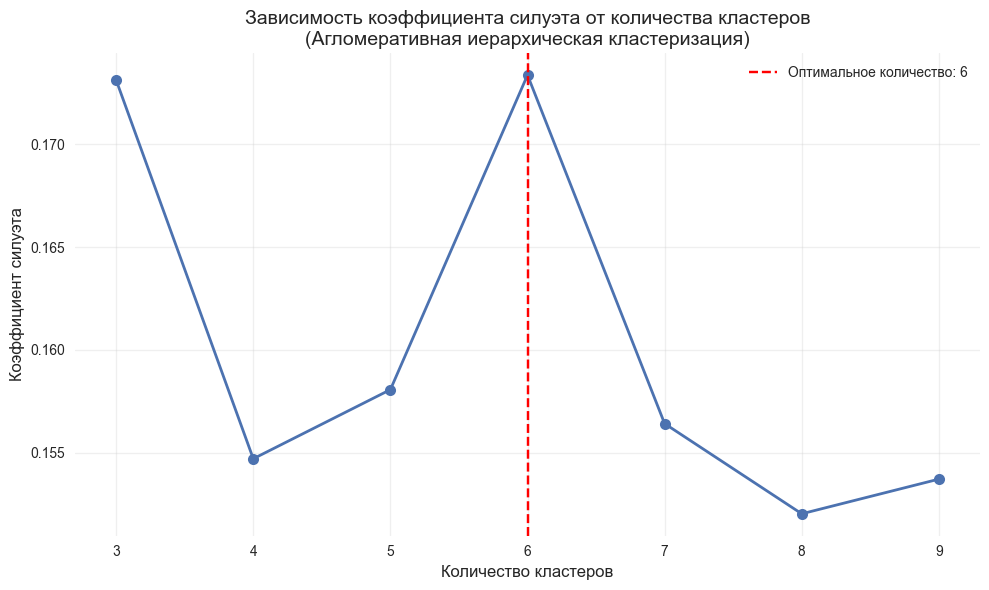


Таблица результатов:
--------------------------------------------------
Кластеры     Коэффициент силуэта      
--------------------------------------------------
3            0.173110                 
4            0.154709                 
5            0.158069                 
6            0.173356                  ← оптимальное
7            0.156415                 
8            0.152035                 
9            0.153719                 
--------------------------------------------------

Дополнительная информация:
Параметры модели: linkage='ward', affinity='euclidean' (по умолчанию)
Размер данных: (8950, 17)


In [15]:
# Агломеративная иерархическая кластеризация
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Диапазон количества кластеров для перебора
n_clusters_range = range(3, 10)  # от 3 до 9 включительно

# Словарь для хранения результатов
silhouette_scores = {}

print("Агломеративная иерархическая кластеризация")
print(f"Перебираем количество кластеров: {list(n_clusters_range)}\n")

# Перебираем количество кластеров
for n_clusters in n_clusters_range:
    # Создаем модель AgglomerativeClustering
    # По умолчанию используется linkage='ward' и affinity='euclidean'
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    
    # Обучаем модель и получаем метки кластеров
    cluster_labels = agg_clustering.fit_predict(X_norm)
    
    # Вычисляем коэффициент силуэта
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg
    
    print(f"Количество кластеров: {n_clusters:2d} | Коэффициент силуэта: {silhouette_avg:.6f}")

# Находим оптимальное количество кластеров (максимальный коэффициент силуэта)
optimal_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
optimal_score = silhouette_scores[optimal_n_clusters]

print(f"\n{'='*60}")
print(f"ОПТИМАЛЬНОЕ КОЛИЧЕСТВО КЛАСТЕРОВ: {optimal_n_clusters}")
print(f"Коэффициент силуэта: {optimal_score:.6f}")
print(f"{'='*60}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 
         marker='o', linewidth=2, markersize=8)
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', 
            label=f'Оптимальное количество: {optimal_n_clusters}')
plt.xlabel('Количество кластеров', fontsize=12)
plt.ylabel('Коэффициент силуэта', fontsize=12)
plt.title('Зависимость коэффициента силуэта от количества кластеров\n(Агломеративная иерархическая кластеризация)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(list(n_clusters_range))
plt.tight_layout()
plt.show()

# Выводим таблицу результатов
print("\nТаблица результатов:")
print("-" * 50)
print(f"{'Кластеры':<12} {'Коэффициент силуэта':<25}")
print("-" * 50)
for n_clusters in sorted(silhouette_scores.keys()):
    marker = " ← оптимальное" if n_clusters == optimal_n_clusters else ""
    print(f"{n_clusters:<12} {silhouette_scores[n_clusters]:<25.6f}{marker}")
print("-" * 50)

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"Параметры модели: linkage='ward', affinity='euclidean' (по умолчанию)")
print(f"Размер данных: {X_norm.shape}")


### Задание 7.10
1 point possible (graded)
Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

Обучаем модель агломеративной иерархической кластеризации
Количество кластеров: 6 (оптимальное из задания 7.9)

Количество наблюдений в каждом кластере:
--------------------------------------------------
Кластер 0:  3946 наблюдений
Кластер 1:  2931 наблюдений
Кластер 2:   864 наблюдений
Кластер 3:   464 наблюдений
Кластер 4:    23 наблюдений
Кластер 5:   722 наблюдений
--------------------------------------------------

САМЫЙ МНОГОЧИСЛЕННЫЙ КЛАСТЕР:
Кластер 0: 3946 наблюдений

Дополнительная информация:
Общее количество наблюдений: 8950
Средний размер кластера: 1491.67
Минимальный размер кластера: 23
Максимальный размер кластера: 3946


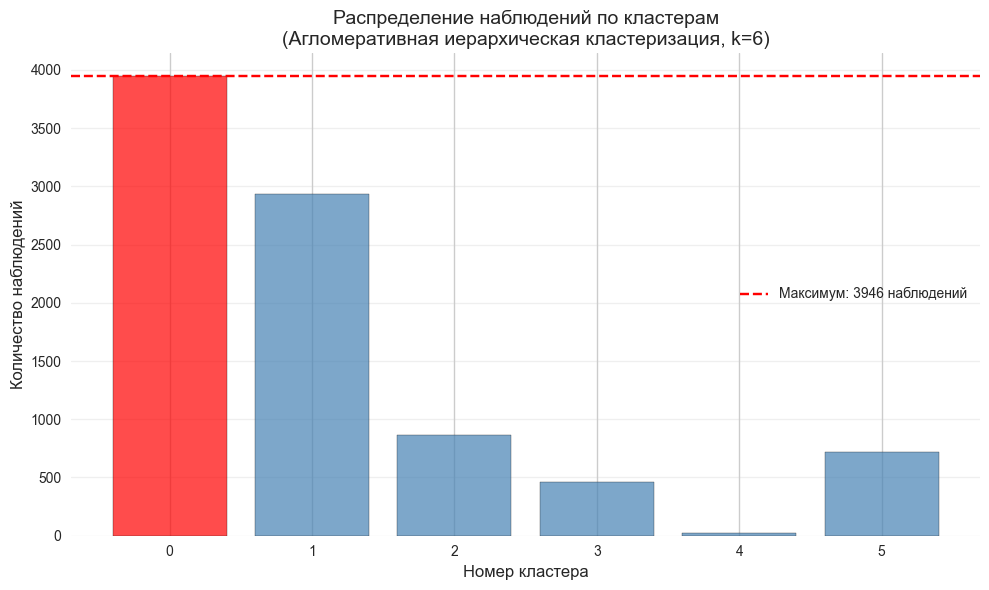

In [13]:
# Агломеративная иерархическая кластеризация с оптимальным количеством кластеров
from sklearn.cluster import AgglomerativeClustering

# Используем оптимальное количество кластеров из задания 7.9
print(f"Обучаем модель агломеративной иерархической кластеризации")
print(f"Количество кластеров: {optimal_n_clusters} (оптимальное из задания 7.9)\n")

# Создаем и обучаем модель AgglomerativeClustering с оптимальным количеством кластеров
agg_clustering_optimal = AgglomerativeClustering(n_clusters=optimal_n_clusters)
cluster_labels = agg_clustering_optimal.fit_predict(X_norm)

# Подсчитываем количество элементов в каждом кластере
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))

print("Количество наблюдений в каждом кластере:")
print("-" * 50)
for cluster_id in sorted(cluster_counts.keys()):
    print(f"Кластер {cluster_id}: {cluster_counts[cluster_id]:5d} наблюдений")
print("-" * 50)

# Находим самый многочисленный кластер
max_cluster_size = max(cluster_counts.values())
max_cluster_id = max([k for k, v in cluster_counts.items() if v == max_cluster_size])

print(f"\n{'='*60}")
print(f"САМЫЙ МНОГОЧИСЛЕННЫЙ КЛАСТЕР:")
print(f"Кластер {max_cluster_id}: {max_cluster_size} наблюдений")
print(f"{'='*60}")

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"Общее количество наблюдений: {len(cluster_labels)}")
print(f"Средний размер кластера: {np.mean(list(cluster_counts.values())):.2f}")
print(f"Минимальный размер кластера: {min(cluster_counts.values())}")
print(f"Максимальный размер кластера: {max_cluster_size}")

# Визуализация распределения по кластерам
plt.figure(figsize=(10, 6))
clusters_sorted = sorted(cluster_counts.keys())
counts_sorted = [cluster_counts[c] for c in clusters_sorted]
colors = ['red' if c == max_cluster_id else 'steelblue' for c in clusters_sorted]

plt.bar(clusters_sorted, counts_sorted, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Номер кластера', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.title(f'Распределение наблюдений по кластерам\n(Агломеративная иерархическая кластеризация, k={optimal_n_clusters})', fontsize=14)
plt.xticks(clusters_sorted)
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=max_cluster_size, color='r', linestyle='--', 
            label=f'Максимум: {max_cluster_size} наблюдений')
plt.legend()
plt.tight_layout()
plt.show()


###
Давайте визуализируем результаты кластеризации k-means, отобразив два признака — количество покупок и кредитный лимит:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()

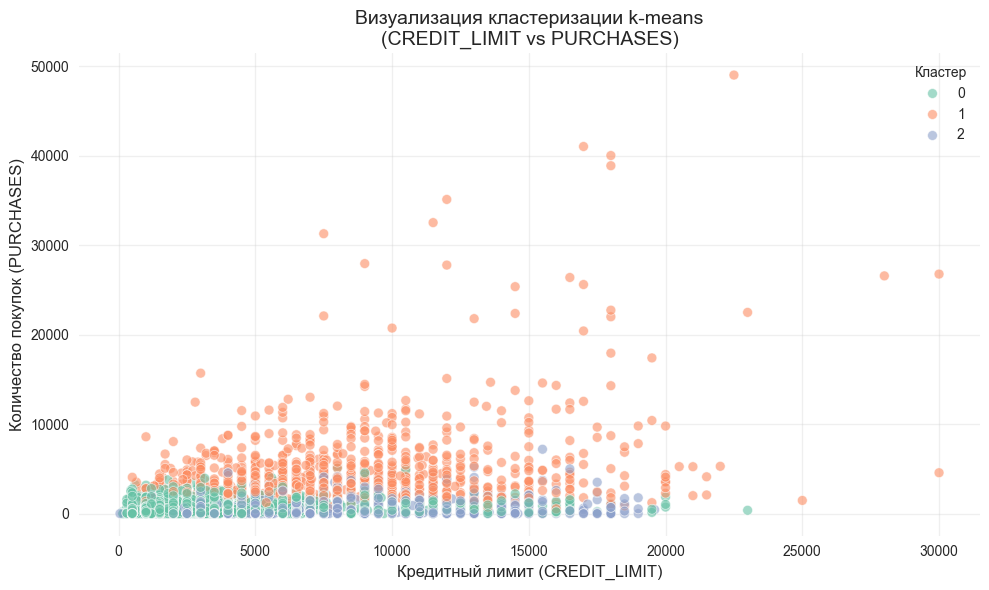

Информация о кластерах:
--------------------------------------------------
Кластер 0:
  Количество наблюдений: 6122
  Средний CREDIT_LIMIT: 3268.70
  Средний PURCHASES: 505.38
--------------------------------------------------
Кластер 1:
  Количество наблюдений: 1233
  Средний CREDIT_LIMIT: 7728.14
  Средний PURCHASES: 4271.97
--------------------------------------------------
Кластер 2:
  Количество наблюдений: 1595
  Средний CREDIT_LIMIT: 6699.41
  Средний PURCHASES: 387.11
--------------------------------------------------


In [14]:
# Визуализация результатов кластеризации k-means
from sklearn.cluster import KMeans

# Создаем и обучаем модель KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)

# Добавляем метки кластеров в датафрейм
df['cluster'] = kmeans.labels_

# Визуализация: scatter plot с двумя признаками
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette='Set2', s=50, alpha=0.6)
plt.xlabel('Кредитный лимит (CREDIT_LIMIT)', fontsize=12)
plt.ylabel('Количество покупок (PURCHASES)', fontsize=12)
plt.title('Визуализация кластеризации k-means\n(CREDIT_LIMIT vs PURCHASES)', fontsize=14)
plt.legend(title='Кластер', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Дополнительная информация
print("Информация о кластерах:")
print("-" * 50)
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"Кластер {cluster_id}:")
    print(f"  Количество наблюдений: {len(cluster_data)}")
    print(f"  Средний CREDIT_LIMIT: {cluster_data['CREDIT_LIMIT'].mean():.2f}")
    print(f"  Средний PURCHASES: {cluster_data['PURCHASES'].mean():.2f}")
    print("-" * 50)


### Итоги
Мы видим, что практически все точки очень плотно сконцентрированы вместе, так что наши результаты с другими алгоритмами вполне предсказуемы.

С точки зрения интерпретации на графике явно выделяется группа тех, кто совершает много покупок по кредитной карте, и тех, кто совершает их меньше и имеет меньший кредитный лимит.

Но, разумеется, это лишь приблизительная интерпретация, ведь качественного разбиения с помощью большинства методов мы так и не получили, а кроме того, здесь мы видим лишь два признака из многих, на основе которых осуществлялась кластеризация.